In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Read data into a DataFrame
df = pd.read_csv('https://s3.eu-west-1.amazonaws.com/neueda.conygre.com/pydata/SPX.csv',
                     index_col='Date',
                     parse_dates=True)

#observe the data
print(df.dtypes)
df.head()

Price       object
Open        object
High        object
Low         object
Change %    object
dtype: object


Price      Open      High       Low Change %
Date                                                       
2017-12-29  2,673.61  2,689.15  2,692.12  2,673.61   -0.52%
2017-12-28  2,687.54  2,686.10  2,687.66  2,682.69    0.18%
2017-12-27  2,682.62  2,682.10  2,685.64  2,678.91    0.08%
2017-12-26  2,680.50  2,679.09  2,682.74  2,677.96   -0.11%
2017-12-22  2,683.34  2,684.22  2,685.35  2,678.13   -0.05%

In [7]:
#Remove , and % symbols. Convert data to numeric
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
df['Open'] = pd.to_numeric(df['Open'].str.replace(',', ''))
df['High'] = pd.to_numeric(df['High'].str.replace(',', ''))
df['Low'] = pd.to_numeric(df['Low'].str.replace(',', ''))
df['Change %'] = pd.to_numeric(df['Change %'].str.replace('%', ''))
df.head()

Price     Open     High      Low  Change %
Date                                                    
2017-12-29  2673.61  2689.15  2692.12  2673.61     -0.52
2017-12-28  2687.54  2686.10  2687.66  2682.69      0.18
2017-12-27  2682.62  2682.10  2685.64  2678.91      0.08
2017-12-26  2680.50  2679.09  2682.74  2677.96     -0.11
2017-12-22  2683.34  2684.22  2685.35  2678.13     -0.05

In [8]:
df.dtypes

Price       float64
Open        float64
High        float64
Low         float64
Change %    float64
dtype: object

In [11]:
#sort data in chronological order
df.sort_values(by = "Date")

Price     Open     High      Low  Change %
Date                                                    
2006-01-04  1273.46  1268.80  1275.37  1267.74      0.37
2006-01-05  1273.48  1273.46  1276.91  1270.30      0.00
2006-01-06  1285.45  1273.48  1286.09  1273.48      0.94
2006-01-09  1290.15  1285.45  1290.78  1284.82      0.37
2006-01-10  1289.69  1290.15  1290.15  1283.76     -0.04
...             ...      ...      ...      ...       ...
2017-12-22  2683.34  2684.22  2685.35  2678.13     -0.05
2017-12-26  2680.50  2679.09  2682.74  2677.96     -0.11
2017-12-27  2682.62  2682.10  2685.64  2678.91      0.08
2017-12-28  2687.54  2686.10  2687.66  2682.69      0.18
2017-12-29  2673.61  2689.15  2692.12  2673.61     -0.52

[3017 rows x 5 columns]

<AxesSubplot:xlabel='Date'>

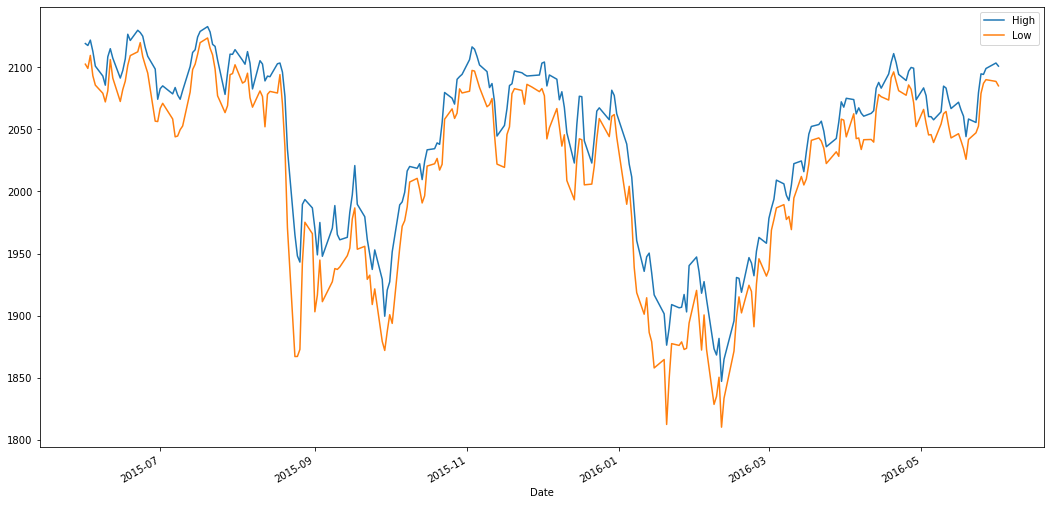

In [18]:
#Plotting a line chart 
rows = "Date >= '2015-06' and Date <= '2016-06'"
cols = ["High", "Low"]
df.query(rows)[cols].plot(figsize=(18,9))

In [20]:
#Finding the minimum, maximum and average of all columns
funcs=['min', 'max', 'mean']
df.agg(funcs)

Price         Open         High          Low   Change %
min    676.530000   679.280000   695.270000   666.790000  -9.030000
max   2690.160000  2692.710000  2694.970000  2685.920000  11.580000
mean  1576.930597  1576.562337  1585.094839  1567.404445   0.032105

Building more visualistions

<AxesSubplot:xlabel='Date'>

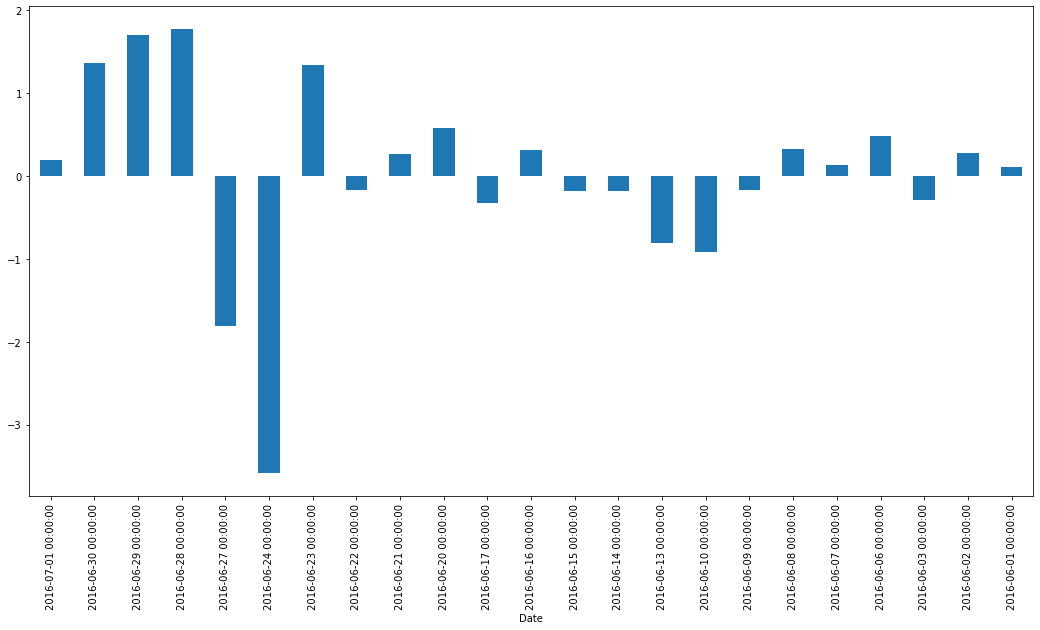

In [35]:
#Line graph showing change trends from June 2016 to July 2016
rows = 'Date>="June 2016" and Date<="July 2016"'
df.query(rows)["Change %"].plot(kind="bar", figsize=(18,9))

<AxesSubplot:>

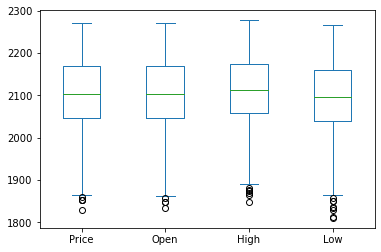

In [50]:
#Box Plot for 2016
cols = ["Price", "Open", "High", "Low"]
df.loc["2016"][cols].plot.box()